PUNTO 1
ARCO 0 1 costara : 16
ARCO 0 2 costara : 34
ARCO 0 3 costara : 32
ARCO 1 2 costara : 18
ARCO 1 3 costara : 21
ARCO 2 3 costara : 7
PUNTO 2
Traveling salesman origin 0
a -> d -> c -> b
Traveling salesman origin 1
b -> c -> d -> a
Traveling salesman origin 2
c -> d -> a -> b
Traveling salesman origin 3
d -> c -> b -> a
PUNTO 3
Max Flow: 78 
PUNTO 4
VERTICES INTERNOS DE LAS REGIONES DE VORONOI: 
[[350.8411215  343.45794393]
 [311.53846154 315.38461538]]
REGIONES DE LAS DIFERENTES CASAS: 
[500, 100]
2
[450, 400]
3
[300, 400]
0
[5, 0]
1
[350, 300]
2
[310, 316]
0


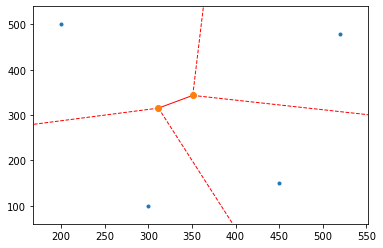

In [52]:
import sys
import copy
from collections import defaultdict
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt

from pprint import pprint
def build_matrix(size, file):
    matrix = []

    file.readline() # Skip empty line.

    # Fetch and process distance matrix.
    for node in range(size):
        distance = file.readline().rsplit()
        matrix.append([])

        # Add neighbors to node list. 
        for neighbor in range(size):
            matrix[node].append(int(distance[neighbor]))

    return matrix

# INPUT: file_name -> string.
# OUTPUT: main_string -> string(file content)
# Description: Returns the file content.
def fetch_info(file_name):
    # Open file to extract info.
    with open(file_name) as file:
        size = int(file.readline().rsplit()[0])
        neighborhood_distance = build_matrix(size, file)
        data_cap = build_matrix(size, file)
        station_location = []

        # TODO: fetch and process statrion location list.

        return neighborhood_distance, data_cap, station_location

# Prints the min path for the traveling salesman problem.
def print_path(path, origin):
    print(chr(97 + origin) + " -> ", end='')

    for city in path:
        print(chr(97 + city), end='')
        if city != path[len(path) - 1]:
            print(" -> ", end='')

    print()

# INPUTS:
#   - distances-> list of lists.
#   - origon-> integer.
#
# OOUTPUT:
#   - path -> list
#
# DESCRIPTION: calculates the minimum path to visit every single city only once
#              and come back to the origin utilising Lexographic order.
#
# TIME COMPLEXITY: o(|V|!) Where |V| is the number or nodes (cities).
#
# BASED ON:
#   - https://www.iosrjournals.org/iosr-jm/papers/Vol6-issue4/A0640108.pdf
def tsp(distances, origin):
    # store all c apart from source vertex
    cities = []
    path = []

    for city in range(len(distances[0])):
        if city != origin:
            cities.append(city)
    # store minimum weight Hamiltonian Cycle
    min_path = sys.maxsize
    possible_paths = get_lexographic_order(cities)
    for current_path in possible_paths:
 
        # store current Path weight(cost)
        current_distance = 0
 
        # compute current path weight
        current_city = origin
        for next_city in current_path:
            if distances[current_city][next_city] != 0:
                current_distance += distances[current_city][next_city]
                current_city = next_city
            else:
                current_distance = sys.maxsize
                break

        current_distance += distances[current_city][origin]
 
        # update minimum
        min_path = min(min_path, current_distance)
        if min_path == current_distance:
            path = current_path

    print_path(path, origin)

# INPUTS:
#   - lst -> list.
#
# OOUTPUT:
#   - lex_set -> list
#
# DESCRIPTION: Obtains all the posible permutations for the list in lexographic 
#              order. (the size of each permutation is as big as the input list)
#
# TIME COMPLEXITY: O(n) where n is the length of the input list or O(|V|) Whhere
#                  |V| is the number of nodes (cities).
#
# BASED ON:
#   - https://www.quora.com/How-would-you-explain-an-algorithm-that-generates-permutations-using-lexicographic-ordering
def get_lexographic_order(lst):
    lex_set = [lst]

    while True:
        largest_x, largest_y = -1, -1

        # Find largest x such that P[x] < P[x+1].
        for i in range(len(lst) - 1):
            if lst[i] < lst[i + 1]:
                largest_x = i;

        # When there is no value that satisfies largest_x there are no more permutations.
        if largest_x == -1:
            break

        # Find largest y such that P[x] < P[y].
        for j in range(len(lst)):
            if lst[largest_x] < lst[j]:
                largest_y = j

        # Swap P[x] and P[y].
        tmp = copy.copy(lst)
        tmp[largest_x], tmp[largest_y] = tmp[largest_y], tmp[largest_x]

        # reverse P[x +1 ... n] and add it to lexographical order set.
        lst = tmp[:largest_x + 1:] + tmp[-1:largest_x:-1]
        lex_set.append(lst)

    return lex_set



####################

#Floyd-Warshall algorithm -Based on GfG https://www.geeksforgeeks.org/floyd-warshall-algorithm-dp-16/
#Finds the sortest paths in a directed and weighted graph
#Input: Graph (adjency matrix)
#Output: 2x2 matrix with the shortest paths(similar to adjency matrix but with shortest paths)
#Time complexity: O(V^3) where V is the number of vertices the graph has

####################

def floyd(graph):

    # This will initialize the result matrix, and will contain the 
    # sortest distances between every pair of vertices
    V = len(graph)
    solution = graph
    

    #We will take every possible vertex as an intermediate vertex, named K
    for k in range(V):
 
        # We will take i as the soruce vertex (from where the path would begin)
        for i in range(V):
 
            # We will take j as the vertex of destination for every i(source)
            for j in range(V):
 
                # We can make two decisions, to take the k intermidiate vertex 
                # of to skip it. We will take it into account only if the k vertex
                # is part of the shortest path

                if solution[i][k] + solution[k][j] < solution[i][j]:
                    solution[i][j] = solution[i][k] + solution[k][j]
                               

    return solution

def bfs(rows, graph, s, t, parent):

    visited = [False] * rows
    queue = []

    queue.append(s)
    visited[s] = True

    while queue:

        u = queue.pop(0)

        for ind, val in enumerate(graph[u]):
            if visited[ind] == False and val > 0:
                queue.append(ind)
                visited[ind] = True
                parent[ind] = u

    return True if visited[t] else False

# Applying fordfulkerson algorithm
def ford_fulkerson(graph, source, sink):
    parent = [-1] * len(graph)
    max_flow = 0

    while bfs(len(graph),graph, source, sink, parent):

        path_flow = float("Inf")
        s = sink
        while(s != source):
            path_flow = min(path_flow, graph[parent[s]][s])
            s = parent[s]

        # Adding the path flows
        max_flow += path_flow

        # Updating the residual values of edges
        v = sink
        while(v != source):
            u = parent[v]
            graph[u][v] -= path_flow
            graph[v][u] += path_flow
            v = parent[v]

    return max_flow

'''

#Voronoid generator 
#Generates a voronoid using the points provided and can locate in which voronoi sector any given point is.
#Input: array of points to generate voronoid diagram, points(houses) for which we will find the nearest voronoid point 
#Output: displays graphic voronoid diagram and prints HOUSE coordinates and area that it belongs to
#Time complexity: O(n log n * m) where n is the number of voronoid points and m its the number of houses to be looked for  


'''

def voronoi_diagram(centrales, casas):
    points = np.array(centrales)
    vor = Voronoi(points, furthest_site = False)
    print("VERTICES INTERNOS DE LAS REGIONES DE VORONOI: ")
    print(vor.vertices)
    fig = voronoi_plot_2d(vor,how_points = True,show_vertices = True, line_colors = "red")
    
    points_normal = centrales
    
    #Search for nearest central 
    voronoi_kdtree = cKDTree(points_normal)
    points_find = casas
    test_point_dist, regions = voronoi_kdtree.query(points_find)
    print("REGIONES DE LAS DIFERENTES CASAS: ")

    for i in range(len(points_find)):
        print(casas[i])
        print(regions[i])
    
    plt.show()  

if __name__ == '__main__':
    cities_dist, flow_graph, station_loc = fetch_info("map1.txt")

    
    print("PUNTO 1")
    #adcency_floyd contains the adjancy matrix that it's the result of floyd-warshall algorithm
    adcency_floyd = floyd(cities_dist)
    #display floyd in a nice and easy to understand format

    for i in range(len(adcency_floyd)):
        for j in range(i+1, len(adcency_floyd[0])):
            print("ARCO " + str(i) + " " + str(j) + " costara : " + str(adcency_floyd[i][j]))

    print("PUNTO 2")
    print("Traveling salesman origin 0")
    tsp(cities_dist, 0)
    print("Traveling salesman origin 1")
    tsp(cities_dist, 1)
    print("Traveling salesman origin 2")
    tsp(cities_dist, 2)
    print("Traveling salesman origin 3")
    tsp(cities_dist, 3)

    print("PUNTO 3")
    
    print("Max Flow: %d " % ford_fulkerson(flow_graph, 0, len(flow_graph) - 1))

    print("PUNTO 4")
    centrales = [[200,500], [300,100], [450,150], [520,480]]
    
    casas = [[500,100], [450, 400], [300,400], [5,0], [350,300], [310,316]]
    
    voronoi_diagram(centrales, casas)
    